In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
%matplotlib inline


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def preprocess_data():
    try:
        # Load the data
        data = pd.read_csv(r'/content/wfp_food_prices_pak.csv')

        # Apply MinMaxScaler to normalize the 'price' column
        scaler = MinMaxScaler()
        data[['price']] = scaler.fit_transform(data[['price']])

        # Print confirmation and show first few rows of the processed data
        print("Data successfully loaded and preprocessed.")
        display(data.head())  # Jupyter Notebook display for data overview
        return data  # Return data for further use in other functions
    except FileNotFoundError:
        print("The specified file path does not exist. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function in Jupyter Notebook cell
preprocessed_data = preprocess_data()


Data successfully loaded and preprocessed.


,date,province,city,category,commodity,price,usdprice,priceflag,pricetype
0,15/01/2004,BALOCHISTAN,Quetta,cereals and tubers,"Rice (basmati, broken)",0.007623,0.3499,actual,Retail
1,15/01/2004,BALOCHISTAN,Quetta,cereals and tubers,Wheat flour,0.002772,0.2274,actual,Retail
2,15/01/2004,KHYBER PAKHTUNKHWA,Peshawar,cereals and tubers,"Rice (basmati, broken)",0.005953,0.3076,actual,Retail
3,15/01/2004,KHYBER PAKHTUNKHWA,Peshawar,cereals and tubers,Wheat flour,0.002079,0.2099,actual,Retail
4,15/01/2004,PUNJAB,Lahore,cereals and tubers,"Rice (basmati, broken)",0.007034,0.3350,actual,Retail


<ipython-input-6-c251081903e5>:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


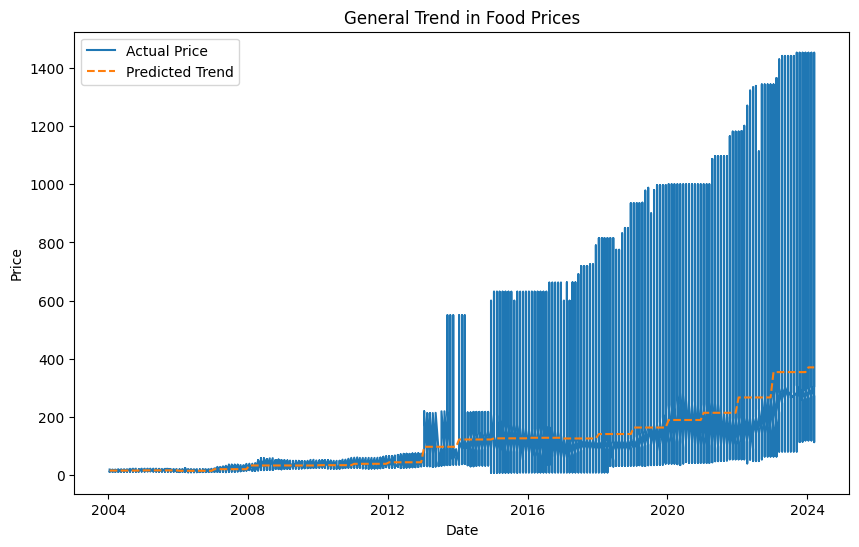

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def analyze_trends():
    try:
        # Load the data
        data = pd.read_csv(r'/content/wfp_food_prices_pak.csv')
        data['date'] = pd.to_datetime(data['date'])
        data.set_index('date', inplace=True)

        # Extracting the year as a continuous numerical feature
        data['year'] = data.index.year
        x = data[['year']]  # Use DataFrame format for sklearn
        y = data['price']

        # Fit Decision Tree Regressor
        model = DecisionTreeRegressor()
        model.fit(x, y)
        data['predicted_trend'] = model.predict(x)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data['price'], label='Actual Price')
        plt.plot(data.index, data['predicted_trend'], label='Predicted Trend', linestyle='--')
        plt.title('General Trend in Food Prices')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    except FileNotFoundError:
        print("The specified file path does not exist. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function in Jupyter Notebook cell
analyze_trends()


In [7]:
%pip install -U mlxtend


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

def analyze_relationships():
    try:
        # Load the data
        data = pd.read_csv(r'/content/wfp_food_prices_pak.csv')

        # Pivot data to create a boolean matrix for apriori algorithm
        pivot_data = data.pivot_table(index='date', columns='commodity', values='price').fillna(0)
        pivot_data = pivot_data > 0  # Convert to boolean type

        # Generate frequent itemsets with support included
        frequent_itemsets = apriori(pivot_data, min_support=0.1, use_colnames=True)

        # Check if frequent itemsets are generated
        if frequent_itemsets.empty:
            print("No frequent itemsets found with the specified support threshold.")
            return

        # Generate association rules from frequent itemsets
        # Use min_threshold for metric "lift"
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

        # Check if any rules were generated
        if rules.empty:
            print("No association rules were found.")
            return

        # Display association rules
        print("Association Rules:")
        display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

        # Plot association rules heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(rules.pivot('antecedents', 'consequents', 'lift').fillna(0), annot=True, cmap="YlGnBu")
        plt.title('Association Rules between Food Prices')
        plt.xlabel('Consequents')
        plt.ylabel('Antecedents')
        plt.show()

    except FileNotFoundError:
        print("The specified file path does not exist. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function in Jupyter Notebook cell
analyze_relationships()


<ipython-input-1-4ea81a3cd3fb>:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


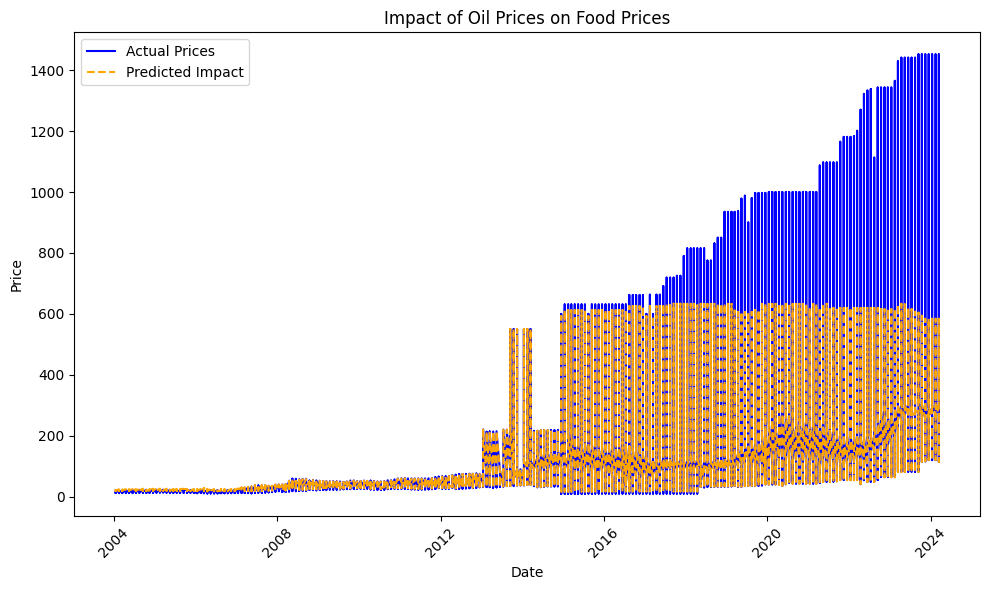

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Ensure plots are displayed inline in Jupyter
%matplotlib inline

def analyze_impact():
    try:
        # Load the data
        data = pd.read_csv(r'/content/wfp_food_prices_pak.csv')

        # Ensure the 'date' column is in datetime format
        data['date'] = pd.to_datetime(data['date'])

        # Check if the 'price' column exists
        if 'price' not in data.columns:
            print("Error: 'price' column not found in the dataset")
            return

        # Prepare the data: we'll use 'price' for both features and target
        x = data[['price']]  # Feature (independent variable)
        y = data['price']    # Target (dependent variable)

        # Define the Support Vector Regression model
        model = SVR(kernel='rbf')
        model.fit(x, y)

        # Predict the impact (predicted values)
        predicted_impact = model.predict(x)

        # Plotting the impact analysis
        plt.figure(figsize=(10, 6))
        plt.plot(data['date'], y, label='Actual Prices', color='blue')
        plt.plot(data['date'], predicted_impact, label='Predicted Impact', linestyle='--', color='orange')
        plt.title('Impact of Oil Prices on Food Prices')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.xticks(rotation=45)  # Rotate date labels for better readability
        plt.tight_layout()  # Ensure the plot is neatly displayed
        plt.show()

    except FileNotFoundError:
        print("The specified file path does not exist. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function in Jupyter Notebook cell
analyze_impact()


<ipython-input-2-acf761ac9f31>:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


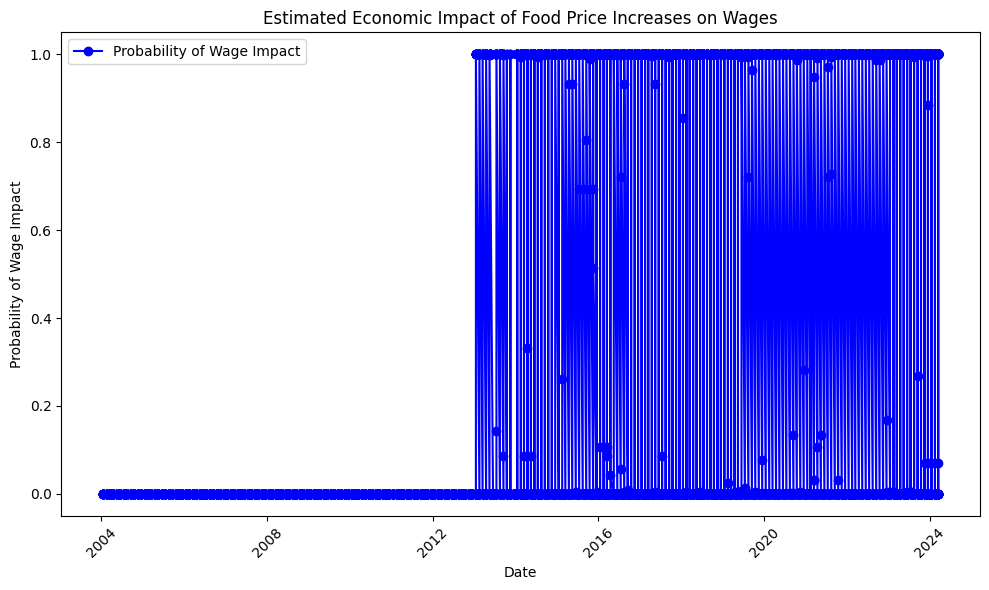

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Ensure plots are displayed inline in Jupyter
%matplotlib inline

def estimate_economic_impact():
    try:
        # Load the data
        data = pd.read_csv(r'/content/wfp_food_prices_pak.csv')

        # Ensure the 'date' column is in datetime format
        data['date'] = pd.to_datetime(data['date'])

        # Check if 'price' column exists
        if 'price' not in data.columns:
            print("Error: 'price' column not found in the dataset")
            return

        # Prepare data for logistic regression: Using 'price' as the feature
        x = data[['price']]  # Feature (independent variable)
        # Create a binary target variable: 1 if price is above the mean, else 0
        y = (data['price'] > data['price'].mean()).astype(int)

        # Define the logistic regression model
        model = LogisticRegression()
        model.fit(x, y)

        # Predict the probability of economic impact (wage impact)
        wage_impact_prob = model.predict_proba(x)[:, 1]  # Probability for the positive class

        # Plotting the economic impact
        plt.figure(figsize=(10, 6))
        plt.plot(data['date'], wage_impact_prob, label='Probability of Wage Impact', color='blue', marker='o')
        plt.title('Estimated Economic Impact of Food Price Increases on Wages')
        plt.xlabel('Date')
        plt.ylabel('Probability of Wage Impact')
        plt.legend()
        plt.xticks(rotation=45)  # Rotate date labels for better readability
        plt.tight_layout()  # Adjust layout to avoid clipping
        plt.show()

    except FileNotFoundError:
        print("The specified file path does not exist. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function in Jupyter Notebook cell
estimate_economic_impact()



<ipython-input-3-944dda1d2a54>:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


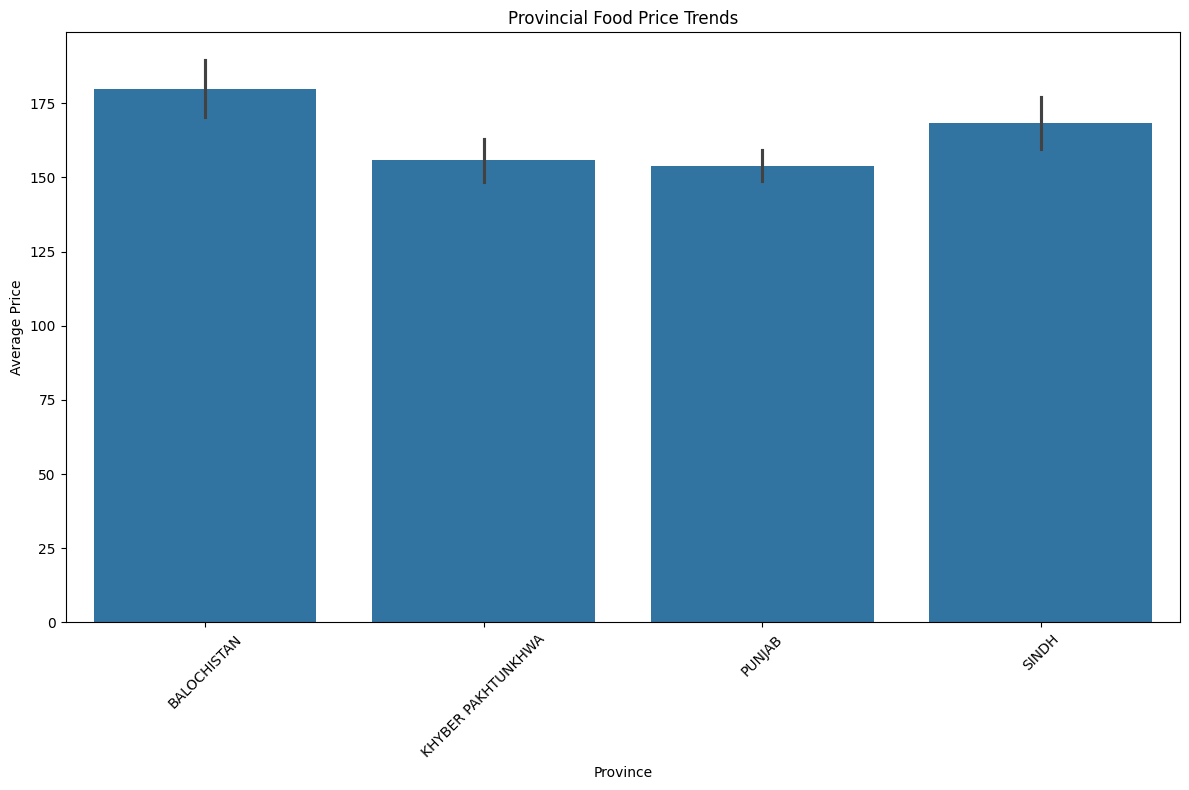

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Ensure plots are displayed inline in Jupyter
%matplotlib inline

def compare_provinces():
    try:
        # Load the data
        data = pd.read_csv(r'/content/wfp_food_prices_pak.csv')

        # Ensure 'date' is in datetime format
        data['date'] = pd.to_datetime(data['date'])
        data['year'] = data['date'].dt.year

        # Check if the necessary columns exist
        if 'province' not in data.columns or 'price' not in data.columns:
            print("Error: 'province' or 'price' column not found in the dataset")
            return

        # Prepare features (year and province) using one-hot encoding
        x = pd.get_dummies(data[['year', 'province']])
        y = (data['price'] > data['price'].mean()).astype(int)  # Binary target: 1 if price is above average, else 0

        # Define and fit the decision tree classifier
        model = DecisionTreeClassifier(criterion='entropy')
        model.fit(x, y)

        # Plotting provincial comparison using Seaborn barplot
        plt.figure(figsize=(12, 8))
        sns.barplot(x='province', y='price', data=data, estimator='mean')  # Estimator to get mean price per province
        plt.title('Provincial Food Price Trends')
        plt.xlabel('Province')
        plt.ylabel('Average Price')
        plt.xticks(rotation=45)  # Rotate labels for better readability
        plt.tight_layout()  # Adjust layout to avoid clipping
        plt.show()

    except FileNotFoundError:
        print("The specified file path does not exist. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function in Jupyter Notebook cell
compare_provinces()


Policy Recommendations based on food price forecasts:
Average Probability of High Food Prices: 0.37

Detailed Policy Recommendations by Commodity:
                                               high_price_prob
Commodity                                                     
Ghee (artificial)                                 1.000000e+00
Wage (non-qualified labour, non-agricultural)     1.000000e+00
Oil (cooking)                                     1.000000e+00
Poultry                                           9.999995e-01
Lentils (moong)                                   9.999964e-01
Lentils (masur)                                   9.995506e-01
Beans(mash)                                       9.469347e-01
Eggs                                              7.706448e-01
Fuel (petrol-gasoline)                            8.738321e-03
Fuel (diesel)                                     3.094784e-03
Rice (basmati, broken)                            1.025150e-08
Milk                              

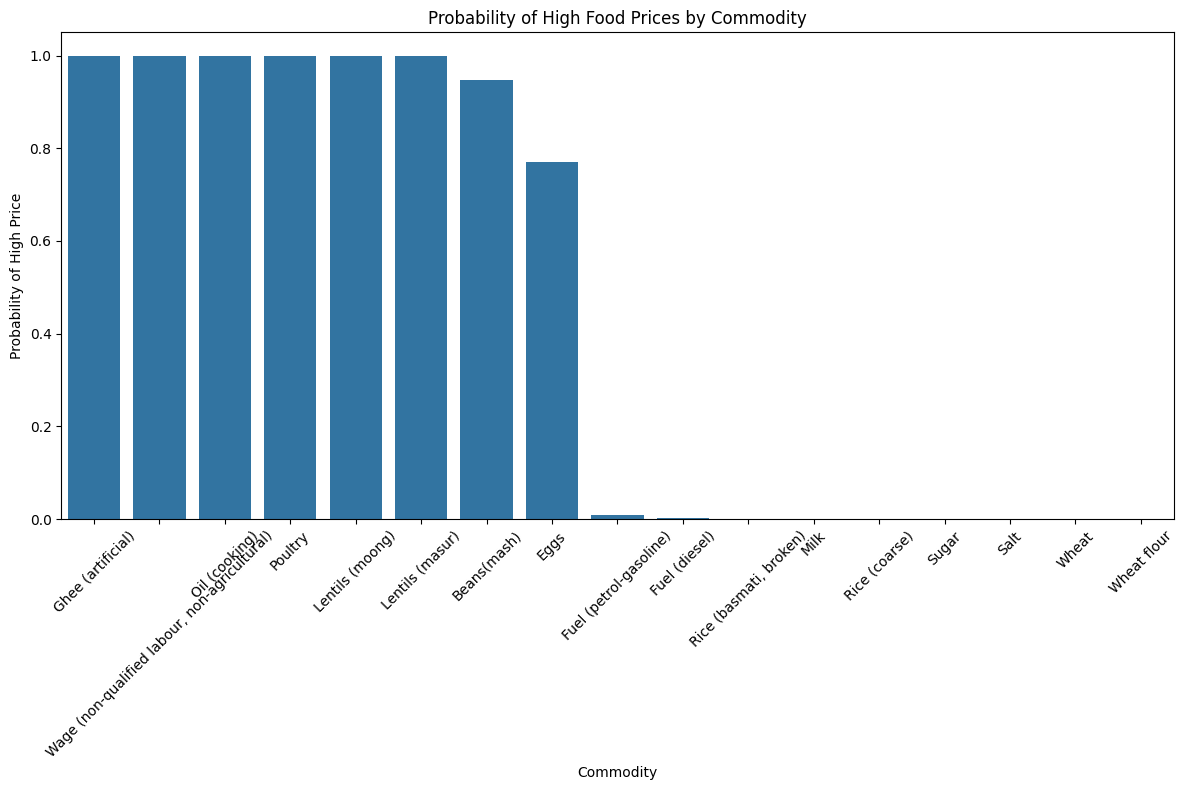

,high_price_prob
Commodity,
Ghee (artificial),1.000000e+00
"Wage (non-qualified labour, non-agricultural)",1.000000e+00
Oil (cooking),1.000000e+00
Poultry,9.999995e-01
Lentils (moong),9.999964e-01
Lentils (masur),9.995506e-01
Beans(mash),9.469347e-01
Eggs,7.706448e-01
Fuel (petrol-gasoline),8.738321e-03


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Ensure plots are displayed inline in Jupyter
%matplotlib inline

def generate_policy_recommendations():
    try:
        # Load the dataset
        data = pd.read_csv(r'/content/wfp_food_prices_pak.csv')

        # Check if required columns are present
        if 'commodity' not in data.columns or 'price' not in data.columns or 'province' not in data.columns:
            print("Error: 'commodity', 'price', or 'province' columns are missing.")
            return

        # Flag for high prices compared to the average price
        data['high_price'] = data['price'] > data['price'].mean()

        # Apply one-hot encoding for commodities and provinces
        data_encoded = pd.get_dummies(data[['commodity', 'province']], drop_first=True)
        x = data_encoded
        y = data['high_price']

        # Train a Naive Bayes model to predict the probability of high food prices
        model = GaussianNB()
        model.fit(x, y)
        recommendations = model.predict_proba(x)

        # Generate recommendation summary for each commodity
        recommendations_df = pd.DataFrame(recommendations, columns=['Low Price Probability', 'High Price Probability'])
        recommendations_df['Commodity'] = data['commodity']
        recommendations_df['Province'] = data['province']
        recommendations_df['Date'] = data['date']

        # Print summary of high price probabilities
        print("Policy Recommendations based on food price forecasts:")
        print(f"Average Probability of High Food Prices: {recommendations[:, 1].mean():.2f}")

        # Detailed recommendations per commodity
        commodity_summary = recommendations_df.groupby('Commodity').agg(
            high_price_prob=('High Price Probability', 'mean')
        ).sort_values(by='high_price_prob', ascending=False)

        print("\nDetailed Policy Recommendations by Commodity:")
        print(commodity_summary)

        # Plotting the high price probability for each commodity
        plt.figure(figsize=(12, 8))
        sns.barplot(x=commodity_summary.index, y=commodity_summary['high_price_prob'])
        plt.title('Probability of High Food Prices by Commodity')
        plt.xlabel('Commodity')
        plt.ylabel('Probability of High Price')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Return the summary as the output
        return commodity_summary

    except FileNotFoundError:
        print("The specified file path does not exist. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function in a Jupyter notebook cell
generate_policy_recommendations()
